In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.tools.plotting import scatter_matrix
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats
import math as mt

C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
 

In [2]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [3]:
cd C:\Users\lc.mojica639\Documents\Cientificas de Datos\Bootcamp

C:\Users\lc.mojica639\Documents\Cientificas de Datos\Bootcamp


In [4]:
df = pd.read_csv('OnlineNewsPopularityRegression.csv',sep=';',encoding='latin')

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0,1,0,0,0,0,0,0,0,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0,1,0,0,0,0,0,0,0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0,1,0,0,0,0,0,0,0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0,1,0,0,0,0,0,0,0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0,1,0,0,0,0,0,0,0,505


In [6]:
df.dtypes

url                               object
timedelta                          int64
n_tokens_title                     int64
n_tokens_content                   int64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
weekday_is_monday                  int64
weekday_is_tuesday                 int64
weekday_is_wednesday               int64
weekday_is_thursday                int64
weekday_is_friday                  int64
weekday_is_satur

In [7]:
df.shape

(39681, 28)

In [8]:
pandas_profiling.ProfileReport(df)

Number of variables,28
Number of observations,39681
Total Missing (%),0.0%
Total size in memory,8.5 MiB
Average record size in memory,224.0 B
Numeric,12
Categorical,1
Boolean,14
Date,0
Text (Unique),0
Rejected,1


In [9]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
count,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,...,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000,39681.000000
mean,354.878960,10.398755,546.406769,0.530585,0.970238,0.672823,10.882815,3.295960,4.543358,1.250296,...,0.212469,0.167864,0.186235,0.187621,0.183816,0.143671,0.061818,0.068975,0.130793,3394.734508
std,214.367621,2.114106,470.988441,0.137087,0.169933,0.153998,11.330153,3.861175,8.307843,4.109158,...,0.409060,0.373750,0.389301,0.390414,0.387339,0.350760,0.240828,0.253415,0.337178,11622.454599
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470860,1.000000,0.625720,4.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539249,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
75%,544.000000,12.000000,716.000000,0.608696,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2800.000000
max,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,843300.000000


In [10]:
missing_values_table(df)

,Missing Values,% of Total Values
url,0,0.0
timedelta,0,0.0
n_tokens_title,0,0.0
n_tokens_content,0,0.0
n_unique_tokens,0,0.0
n_non_stop_words,0,0.0
n_non_stop_unique_tokens,0,0.0
num_hrefs,0,0.0
num_self_hrefs,0,0.0
num_imgs,0,0.0


La base de datos contiene 28 variables y 39681 registros. No se encuentran valores faltantes dentro del dataset. Se observan outliers en las variables n_unique_tokens, n_non_stop_words y n_non_stop_unique_tokens y formatos diferentes en la variable average_token_length para los valores de 1-10.

## *Preguntas*

**1. Realice la depuración de datos que haga falta y exponga de manera detallada la manera en que realizó la corrección.**

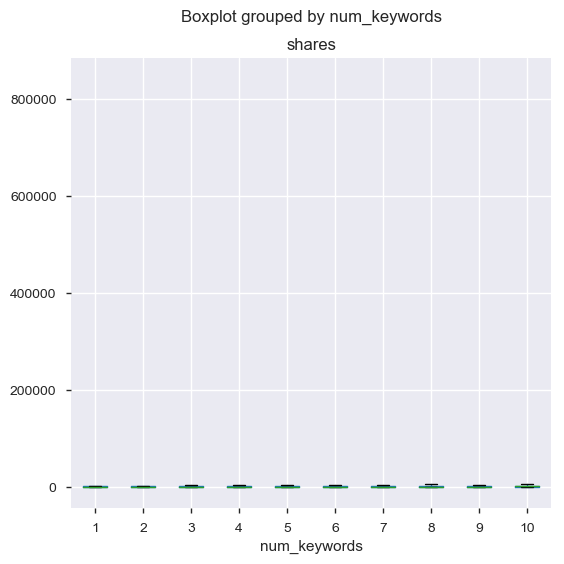

In [11]:
df.boxplot(column='shares',by='num_keywords',figsize=(6,6))

In [12]:
df4=df[df["shares"]>500]
df3=df4[df4["shares"]<10000]
df2=df3[df3["average_token_length"]>100]
df2.shape

(34798, 28)

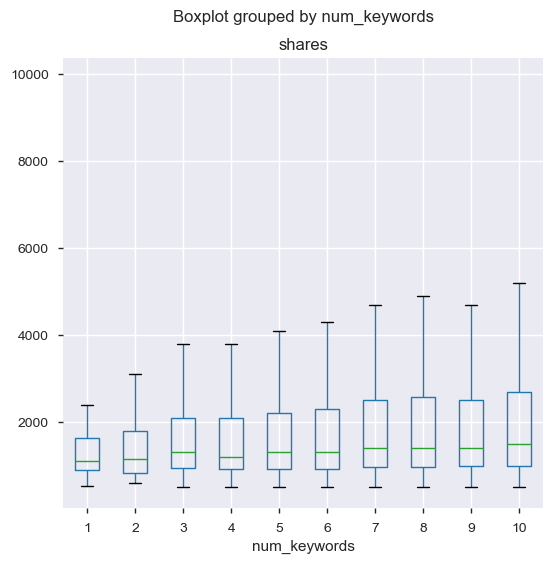

In [13]:
df2.boxplot(column='shares',by='num_keywords',figsize=(6,6))

**Objetivo de negocio**
Estudio del comportamiento de los artículos que se han compartido más de 500 veces para entender cuales son las variables que inciden en la cantidad de shares asociados.

**Depuración de datos**
Se realizó una depuración de los shares > 11000 y < 500, ya que la cantidad de datos en ese rango representan únicamente el 5,511%. 
El registro 31039 presenta problemas en n_unique_tokens, n_non_stop_words y n_non_stop_unique_tokens , se realizá la imputación a través de el método del vecino más cercano, que consiste en identificar registros completos que se "parezcan" en términos de las variables que si se encuentran completas en los registros con datos faltantes, estos registros serán los donantes y el valor faltante se reemplazará por el valor del donante.
En cuanto  a la variable average_token_length se elimina del dataset de estudio los valores < 100 que son los que presentan los problemas de formato porque no son enteros. 

** 2. Genere 4 hipótesis de negocios que se puedan responder usando regresión lineal, donde se 
especifica cuales son las variables independientes y cuales las variables dependientes **

1. Correlación entre las variables shares y num_imgs
2. Correlación entre las variables shares y n_tokens_title
3. Correlación entre las variables shares y is_Weekend
4. Correlación entre las variables shares y n_non_stop_words

Dependiente: shares
Independientes: num_imgs, n_tokens_title, is_weekend y n_non_stop_words

**3. Calcule los estadísticos descriptivos de todas las variables.**

Tabla Principales estadísticas descriptivas

In [14]:
dfSummary=df2[["shares","n_non_stop_words","n_tokens_title","is_weekend","num_imgs"]]
dfSummary.describe(include='all')

,shares,n_non_stop_words,n_tokens_title,is_weekend,num_imgs
count,34798.000000,3.479800e+04,34798.000000,34798.000000,34798.000000
mean,2062.954796,1.000000e+00,10.388097,0.131760,4.494885
std,1748.737600,3.950078e-09,2.111321,0.338235,8.228912
min,501.000000,9.999999e-01,2.000000,0.000000,0.000000
25%,956.000000,1.000000e+00,9.000000,0.000000,1.000000
50%,1400.000000,1.000000e+00,10.000000,0.000000,1.000000
75%,2400.000000,1.000000e+00,12.000000,0.000000,4.000000
max,9900.000000,1.000000e+00,20.000000,1.000000,128.000000


In [15]:
dfSummary.median() 

shares              1400.0
n_non_stop_words       1.0
n_tokens_title        10.0
is_weekend             0.0
num_imgs               1.0
dtype: float64

La mediana es un mejor estadístico de tendencia central en este caso principalmente por la baja frecuencia de observaciones.

**5. Calcule los coeficientes de correlación de Pearson y Spearman entre todas las variables. ¿Hay diferencias?**

In [16]:
pearson=dfSummary.corr(method='pearson')
spearman=dfSummary.corr(method='spearman')

In [17]:
pearson

,shares,n_non_stop_words,n_tokens_title,is_weekend,num_imgs
shares,1.000000,0.005236,-0.039642,0.101356,0.065468
n_non_stop_words,0.005236,1.000000,0.043457,0.028851,0.235299
n_tokens_title,-0.039642,0.043457,1.000000,-0.005651,-0.004510
is_weekend,0.101356,0.028851,-0.005651,1.000000,0.054733
num_imgs,0.065468,0.235299,-0.004510,0.054733,1.000000


In [18]:
spearman

,shares,n_non_stop_words,n_tokens_title,is_weekend,num_imgs
shares,1.000000,0.029573,-0.058105,0.159346,0.079266
n_non_stop_words,0.029573,1.000000,0.026393,0.062406,0.410170
n_tokens_title,-0.058105,0.026393,1.000000,-0.007250,-0.002356
is_weekend,0.159346,0.062406,-0.007250,1.000000,0.044924
num_imgs,0.079266,0.410170,-0.002356,0.044924,1.000000


In [19]:
pearson - spearman

,shares,n_non_stop_words,n_tokens_title,is_weekend,num_imgs
shares,0.000000,-0.024338,0.018463,-0.057989,-0.013798
n_non_stop_words,-0.024338,0.000000,0.017064,-0.033555,-0.174871
n_tokens_title,0.018463,0.017064,0.000000,0.001599,-0.002154
is_weekend,-0.057989,-0.033555,0.001599,0.000000,0.009809
num_imgs,-0.013798,-0.174871,-0.002154,0.009809,0.000000


In [20]:
spearman - pearson

,shares,n_non_stop_words,n_tokens_title,is_weekend,num_imgs
shares,0.000000,0.024338,-0.018463,0.057989,0.013798
n_non_stop_words,0.024338,0.000000,-0.017064,0.033555,0.174871
n_tokens_title,-0.018463,-0.017064,0.000000,-0.001599,0.002154
is_weekend,0.057989,0.033555,-0.001599,0.000000,-0.009809
num_imgs,0.013798,0.174871,0.002154,-0.009809,0.000000


Sí existen diferencias entre los estadisticos de Spearman y Pearson. Como se ve en la tabla de diferencias se observa que para las variables share y n_non_stop_words la correlación de pearson asigna un coeficiente llevándola casi a cero, mientras el estadístico de Spearman da un valor de 0.029573. 
También en el caso de la correlación Shares - is_weekend, el estadístico de Pearson expresa una asociación de 0.101356 mientras el de Spearman muestra una de 0.159346. 
Las diferencias en los valores aunque se vean insignificantes, en algunos casos deben considerearse ya que en el momento de realizar un contraste de hipótesis para verificar la significancia de una correlación estas pequeñas diferencias pueden llevar al rechazo o no de la prueba.

** 7. Realice la estimación por mínimo cuadrados de la regresión lineal entre la variables endógenas y exógenas expuestas en el punto 3 **

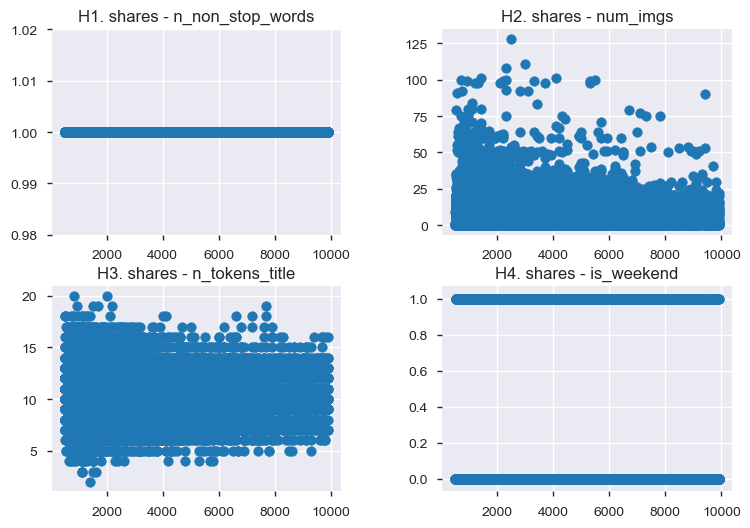

In [21]:
plt.subplot(221)
plt.scatter(x=df2.shares, y=df2.n_non_stop_words)
plt.title('H1. shares - n_non_stop_words')

plt.subplot(222)
plt.scatter(x=df2.shares, y=df2.num_imgs)
plt.title('H2. shares - num_imgs')


plt.subplot(223)
plt.scatter(x=df2.shares, y=df2.n_tokens_title)
plt.title('H3. shares - n_tokens_title')


plt.subplot(224)
plt.scatter(x=df2.shares, y=df2.is_weekend)
plt.title('H4. shares - is_weekend')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

In [22]:
RegresionA = ols(formula="shares~num_imgs+n_non_stop_words+is_weekend+n_tokens_title", data=df2).fit()

In [23]:
RegresionA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     136.8
Date:                Fri, 08 Mar 2019   Prob (F-statistic):          3.21e-116
Time:                        20:11:43   Log-Likelihood:            -3.0893e+05
No. Observations:               34798   AIC:                         6.179e+05
Df Residuals:                   34793   BIC:                         6.179e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           4.7e+09   2.43e+09      1.937      0.053   -5.53e+07    9.45e+09
num_imgs            13.2666      1.165     11.391      0.000      10.984      15.549
n_non_stop_words   -4.7e+09   2.43e+09     -1.937      0.053   -9.45e+09    5.53e+07
is_weekend         506.8274     27.548     18.398      0.000     452.833     560.822
n_tokens_title     -31.7602      4.411     -7.201      0.000     -40.405     -23.115
==============================================================================
Omnibus:                    14359.301   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54989.270
Skew:                           2.102   Prob(JB):                         0.00
Kurtosis:                       7.500   Cond. No.                     4.52e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
RegresionA.params

Intercept           4.699544e+09
num_imgs            1.326660e+01
n_non_stop_words   -4.699542e+09
is_weekend          5.068274e+02
n_tokens_title     -3.176022e+01
dtype: float64

**Ecuación de la recta: **

shares = 1.326660e+01num_imgs - 4.699542e+09n_non_stop_words + 5.068274e+02is_Weekend - 3.176022e+01 n_tokens_title  + 4.699544e+09

In [25]:
Yest=RegresionA.fittedvalues
Yest

0        1913.209778
1        2003.790904
2        2008.490446
3        1984.992735
4        2100.618124
5        1949.365000
6        2264.118781
7        2137.077890
8        1988.097909
9        1972.030682
10       1975.593651
11       1981.429767
12       2131.757343
14       2136.984370
15       1889.712067
17       2021.452500
18       1982.566339
20       2100.618124
21       1989.692278
23       1968.467711
24       1876.750012
25       2035.551126
26       2026.152042
27       2238.511132
30       2012.053416
31       2187.331738
33       1953.232512
34       2040.250669
36       2195.898793
37       2017.584987
            ...     
39643    1977.562252
39644    2030.851584
39645    2123.811293
39646    1922.608863
39647    2023.737561
39649    1926.171832
39651    2164.138570
39652    2044.950212
39653    1881.145012
39654    2076.710435
39655    1967.026596
39656    1886.149097
39657    1799.130940
39659    1986.129309
39660    1953.232512
39662    2054.044752
39663    1994

In [26]:
Residuos=RegresionA.resid
Residuos

0       -1320.209778
1       -1292.790904
2        -508.490446
3        -784.992735
4       -1595.618124
5       -1094.365000
6       -1708.118781
7       -1246.077890
8        1611.902091
9       -1262.030682
10        224.406349
11        -81.429767
12      -1308.757343
14      -1375.984370
15       -289.712067
17       1078.547500
18       3717.433661
20        699.381876
21      -1391.692278
23       -468.467711
24      -1024.750012
25      -1252.551126
26       -526.152042
27       -438.511132
30       1187.946584
31       1712.668262
33      -1380.232512
34       1559.749331
36       5504.101207
37        582.415013
            ...     
39643    -677.562252
39644    -430.851584
39645   -1257.811293
39646   -1316.608863
39647    2976.262439
39649   -1397.171832
39651    -464.138570
39652   -1283.950212
39653    -923.145012
39654   -1172.710435
39655    -767.026596
39656    2613.850903
39657    -599.130940
39659    -686.129309
39660    1246.767488
39662    1345.955248
39663   -1022

In [27]:
df1=pd.DataFrame({'y':df2.shares,'yest':RegresionA.fittedvalues, 'Residuos':RegresionA.resid})

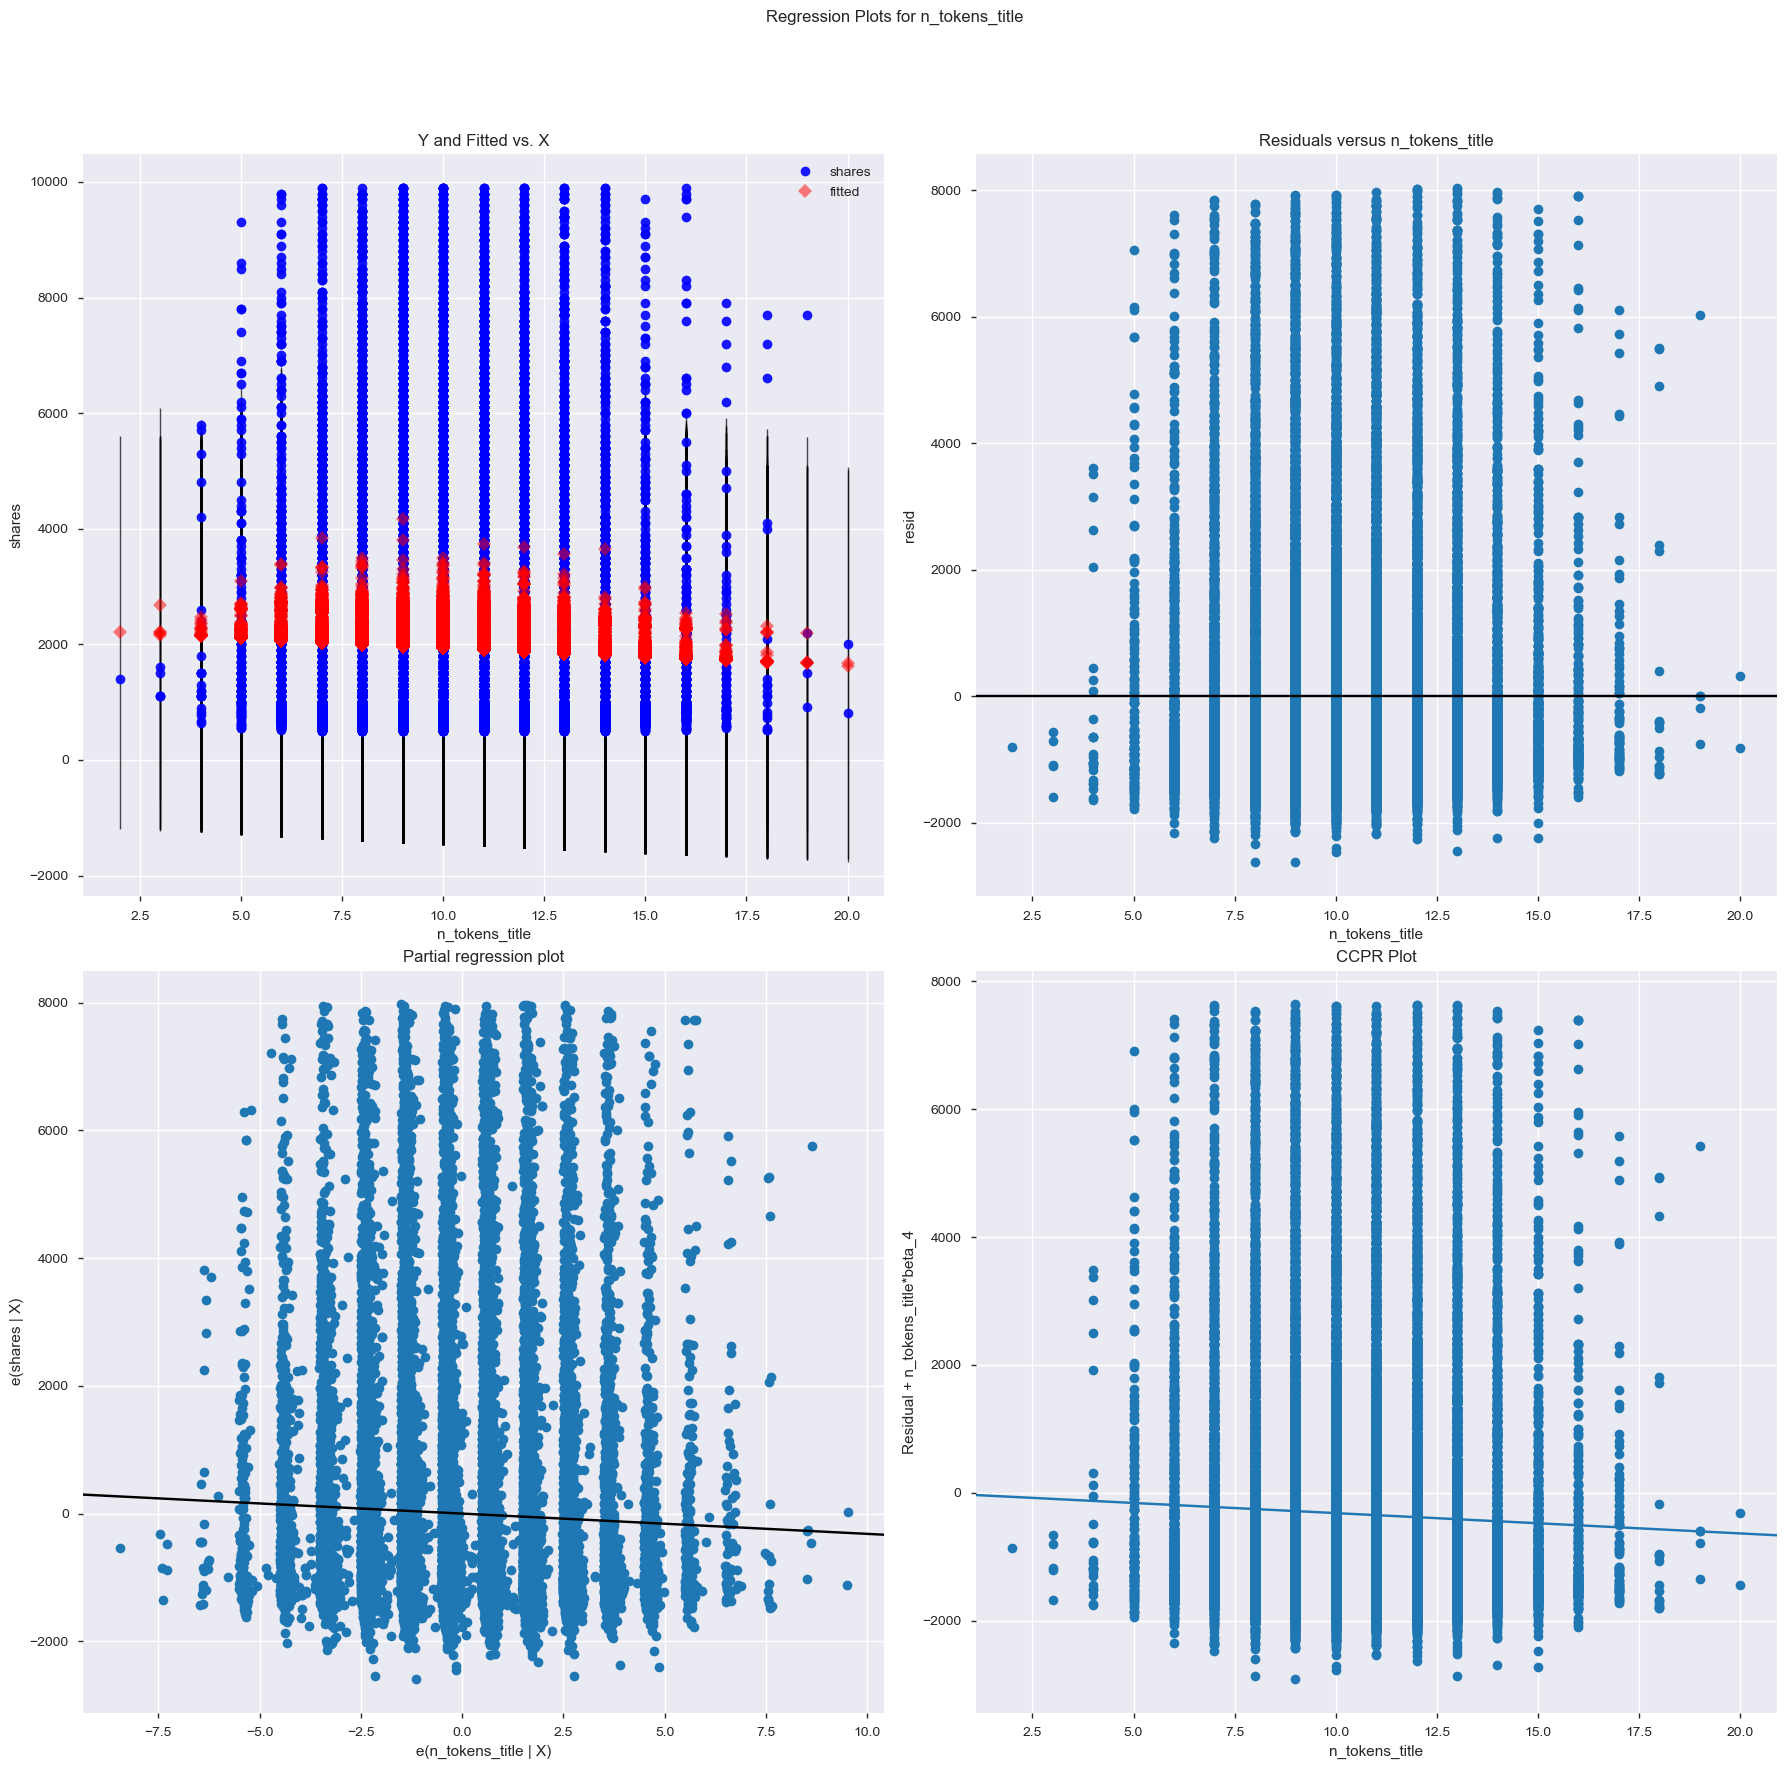

In [28]:
fig = plt.figure(figsize=(18,18))
fig = sm.graphics.plot_regress_exog(RegresionA,exog_idx='n_tokens_title',fig=fig)

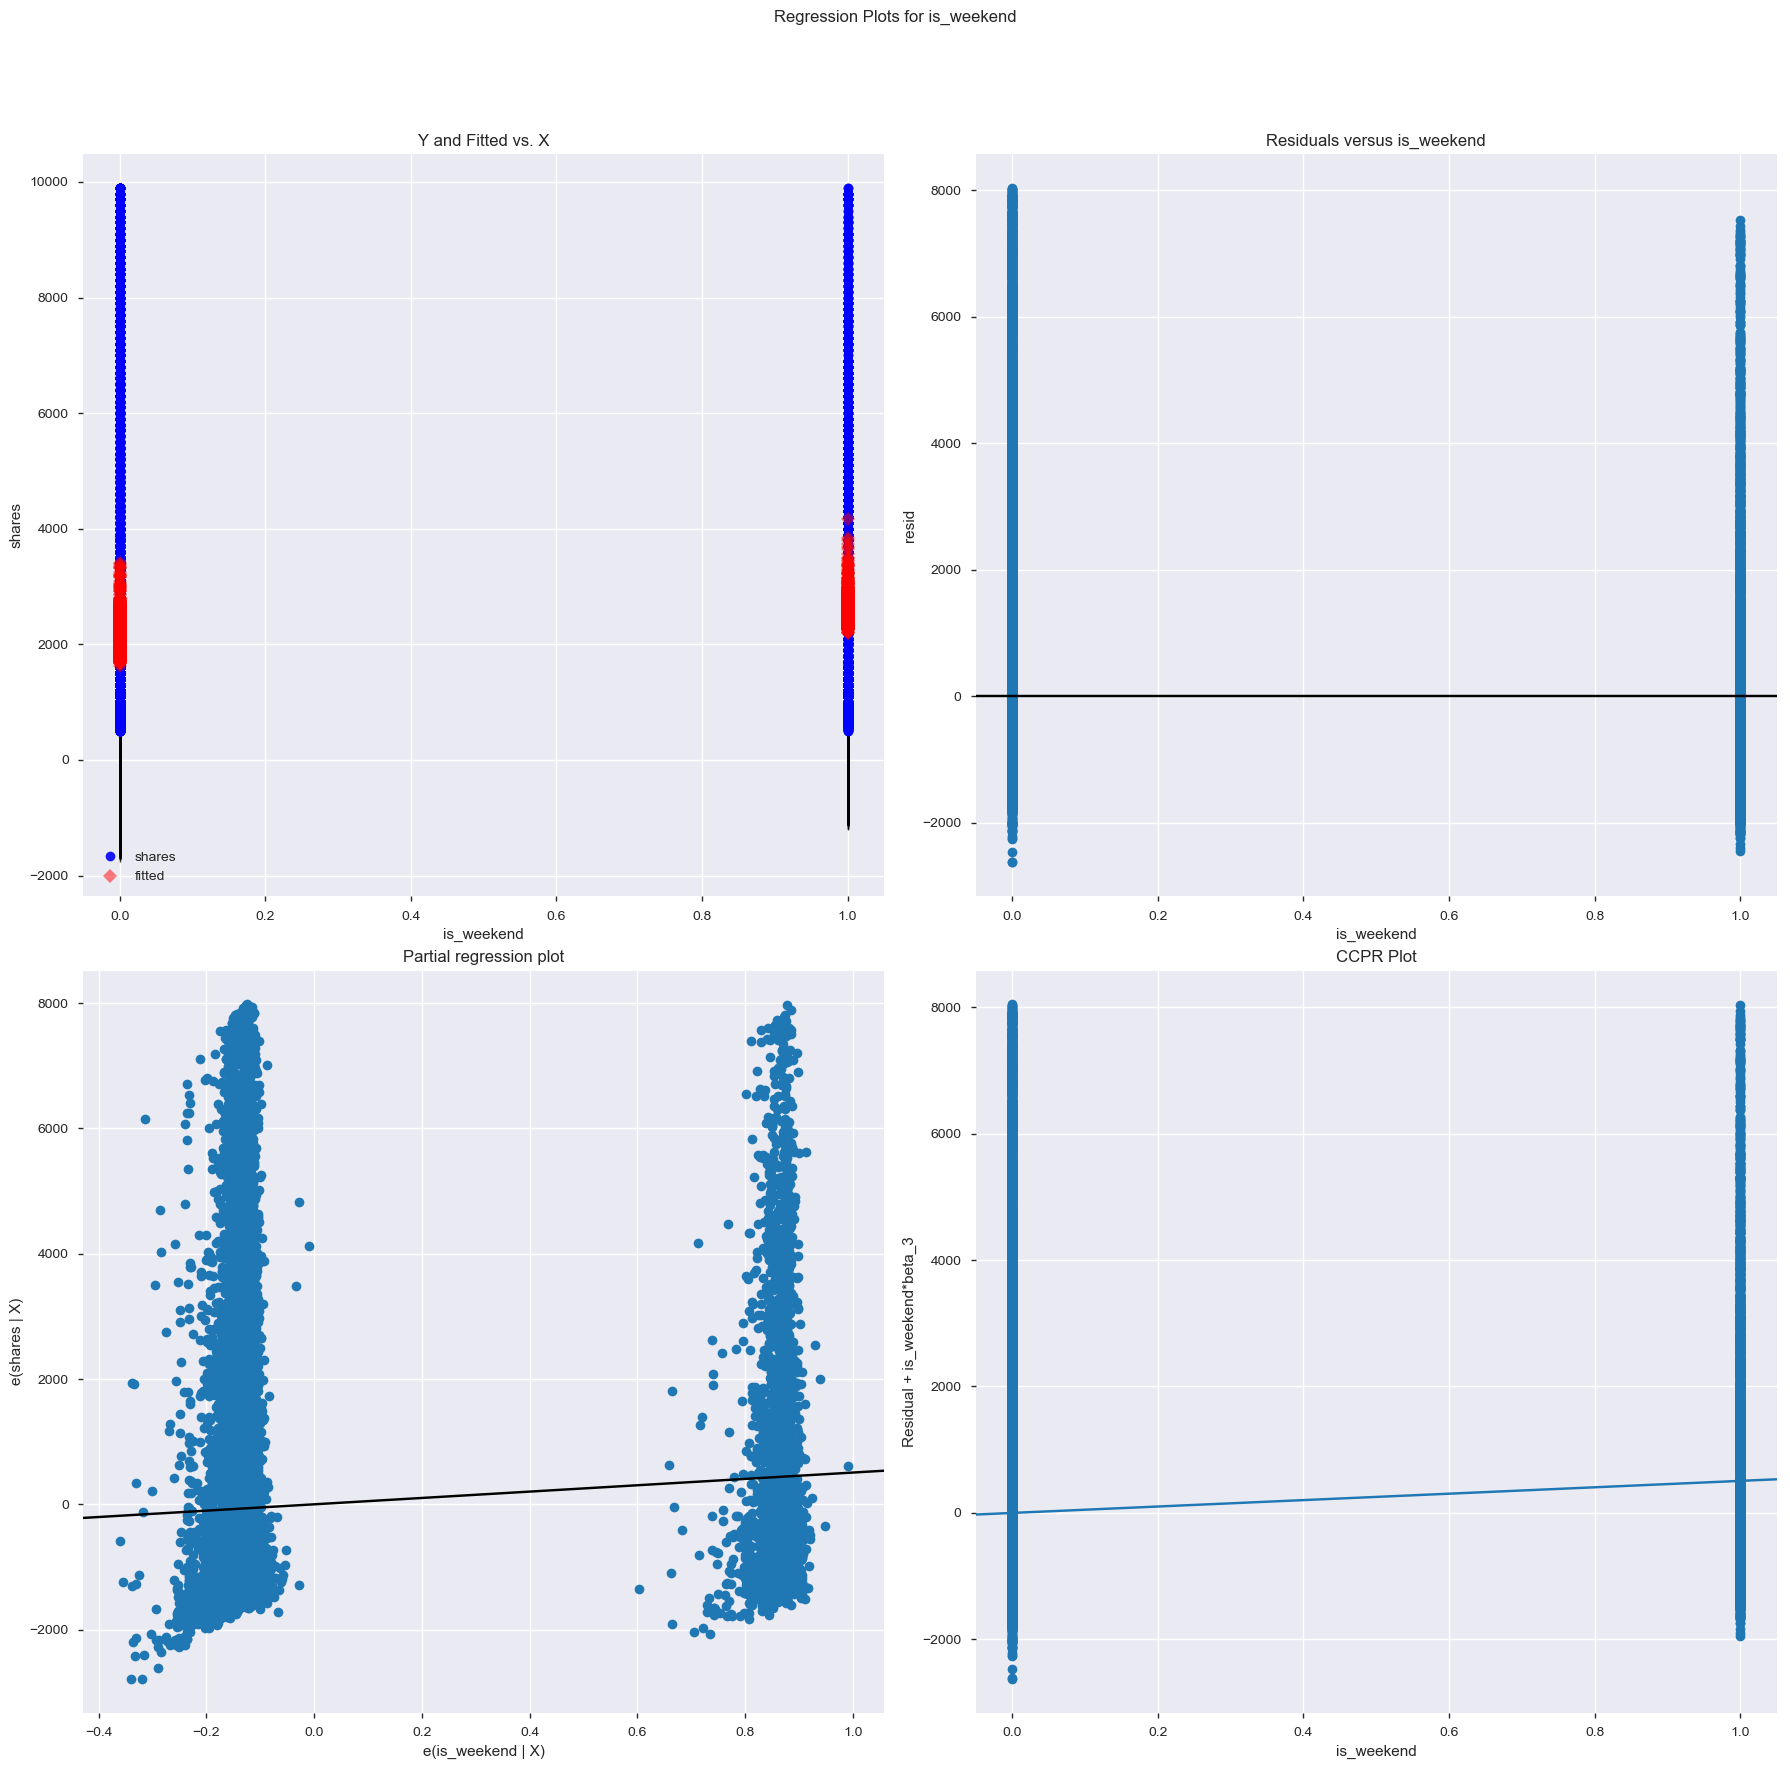

In [29]:
fig = plt.figure(figsize=(18,18))
fig = sm.graphics.plot_regress_exog(RegresionA,exog_idx='is_weekend',fig=fig)

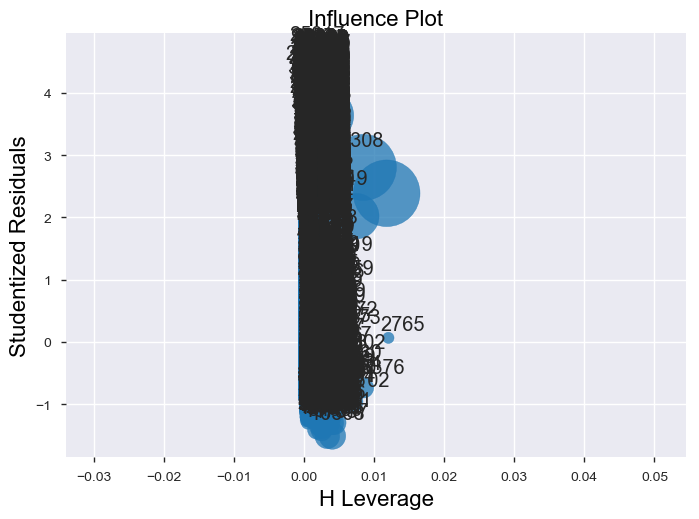

In [31]:
inf =influence_plot(RegresionA)

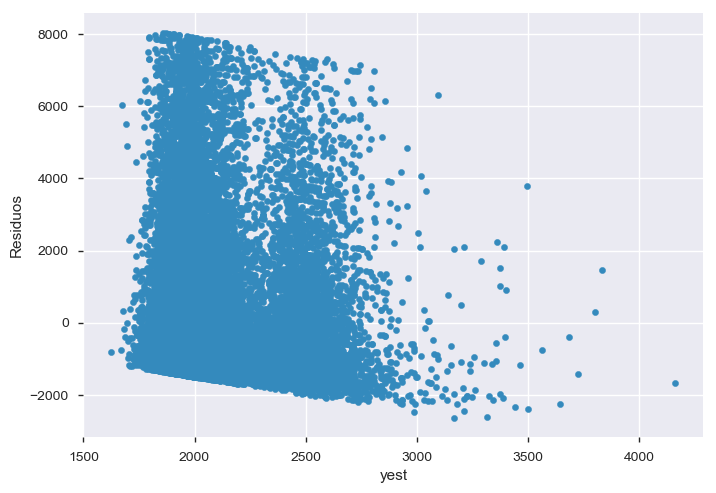

In [33]:
df1.plot(x='yest',y='Residuos',kind='scatter')

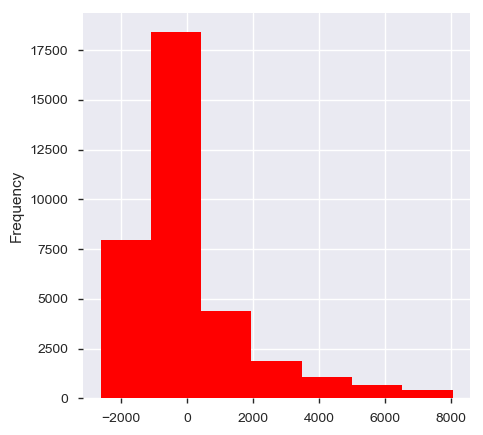

In [34]:
Residuos.plot(kind='hist',color="red", figsize=(5,5), bins=7)

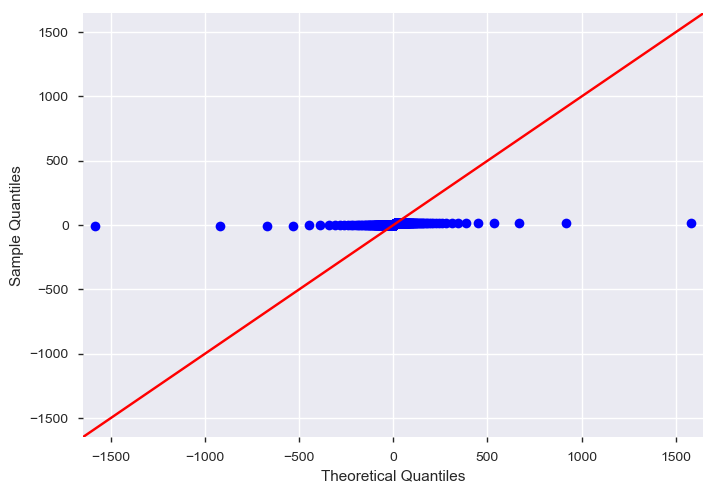

In [35]:
fig = sm.qqplot(Residuos, stats.t, fit=True, line='45')

In [36]:
stats.kstest(Residuos, 'norm')

KstestResult(statistic=0.6897859736620371, pvalue=0.0)

In [37]:
stats.shapiro(Residuos)

C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.7499914169311523, 0.0)

In [38]:
Residuos.mean()

-1.4548534921917657e-05

In [39]:
Residuos.var()

3010721.495595331

** 8. Interprete los siguientes resultados del modelo: a. Coeficientes estimados ¿Son todos significativos? b. R-cuadrado ¿Tiene un buen ajuste el modelo? c. ¿Los residuos tienen distribución normal? **

**a. Coeficientes estimados**

En la tabla Resultados del Modelo, se observa que a un nivel de significancia del 5%, los coeficientes correspondientes a num_imgs, is_weekend y n_tokens_title, son significativos, lo que era de esperarse del análisis de correlaciones. Mientras que el asociados a la variable n_non_stop_words no contribuyen al modelo. El intercepto por su parte no es significativo, ya que su coeficiente es muy pequeño. En este sentido un modelo más apropiado para estimar la cantidad de shares, sería un modelo que considere solamente las variables sobre la el número de imágenes, si es fin de semana y el número de palabras en el título. Por otro lado, hay que anotar que tal vez con una muestra más grande, es decir con un mayor número de observaciones, el comportamiento de las variables no significativas podría ser diferente y podrían incluirse eventualmente en un modelo si aportan un mejor ajuste.

**b. R-cuadrado**

El R2 tiene un valor de 0.015, el cual no es un buen ajuste que es soportado cuando los supuestos del modelo estimado por mínimos cuadrados no se cumplen y no todos los coeficientes son significativos, sin embargo, en este caso tres de las 4 variables son significativas por lo que es aconsejable ver el R2 Ajustado: 0.015, que realiza una correción sobre la cantidad de variables. El valor de R2 ajustado tampoco es signficativo, sin embargo como se observa en el gráfico de valores observados vs ajustados, el ajuste no es el mejor, lo que puede ser causado por el tamaño de muestra tan pequeño. En conclusiónel R2 tiene un valor que indica un mal ajuste, el modelo no es correcto ya que se debe considerar eliminar del modelo las variables no significativas.

**c. ¿Los residuos tienen distribución Normal?**

El Q-Q plot de los residuos nos da un indicio de que los residuos no se distribuyen normalmente cuando se comparan con los percenties de una distribución normal. Finalmente las prueba de Shapiro y Kstest, a un nivel de significancia de 0.05, arroja un p-valor de 0.0, con lo que hay evidencia para rechazar la hipótesis de que los errores se distribuyen normalmente. Por otro lado la media de los residuos efectivamente es -1.2641186289105157e-05.

**9. Realice la depuración del modelo de tal forma que le permita especificar los factores que determinan la cantidad de artículos que comporten en la red dado el dataset de la compañía Mashable.**

Un modelo se ajustaría mejor al propósito de estimar la cantidad de artículos compartidos sería el que involucra solo las variables de número de imágenes, si es fin de semana y el número de palabras en el título, sin intercepto.

In [40]:
RegresionA1 = ols(formula="shares~num_imgs+is_weekend+n_tokens_title-1", data=df2).fit()

In [41]:
RegresionA1.params

num_imgs           18.623439
is_weekend        607.319548
n_tokens_title    174.306778
dtype: float64

In [42]:
RegresionA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                 1.481e+04
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:29:59   Log-Likelihood:            -3.1006e+05
No. Observations:               34798   AIC:                         6.201e+05
Df Residuals:                   34795   BIC:                         6.201e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
num_imgs          18.6234      1.163     16.019      0.000      16.345      20.902
is_weekend       607.3195     28.367     21.409      0.000     551.719     662.920
n_tokens_title   174.3068      1.073    162.421      0.000     172.203     176.410
==============================================================================
Omnibus:                    12951.888   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44075.677
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                       6.953   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
yestA1=RegresionA1.fittedvalues

In [44]:
ResiduosA1=RegresionA1.resid

In [45]:
dfA1=pd.DataFrame({'y':df2.shares,'yest':RegresionA1.fittedvalues, 'Residuos':RegresionA1.resid})

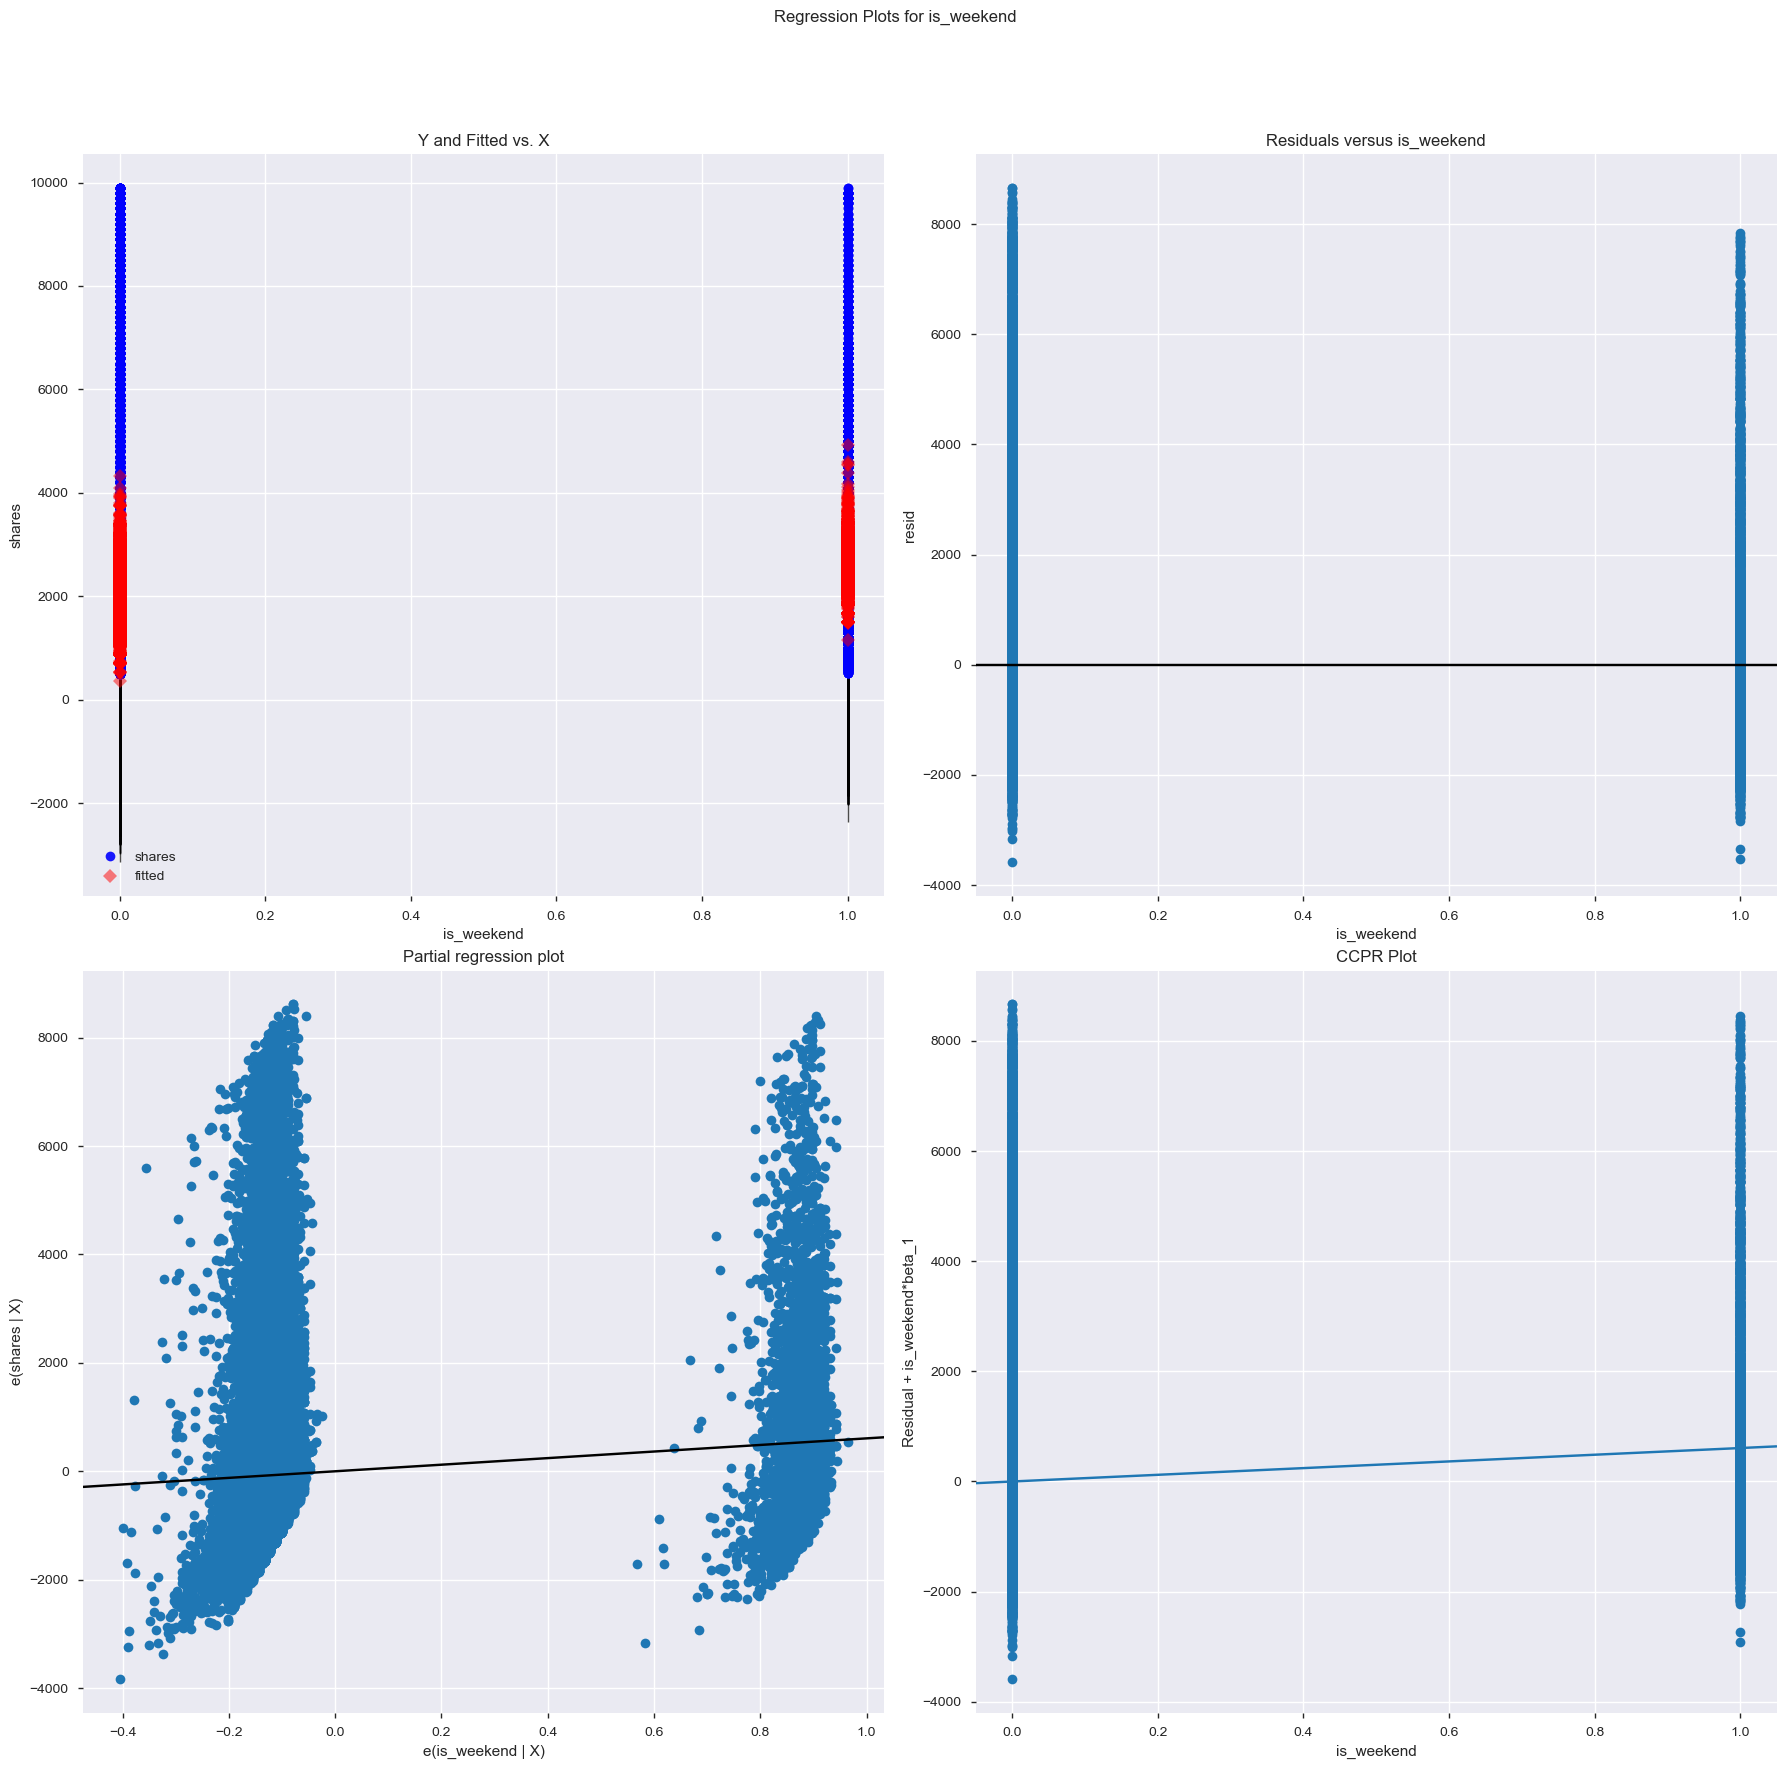

In [46]:
fig = plt.figure(figsize=(18,18))
fig = sm.graphics.plot_regress_exog(RegresionA1,exog_idx='is_weekend',fig=fig)

In [47]:
ResiduosA1.var()

3204400.920043098

In [48]:
ResiduosA1.mean()

88.50817163016582

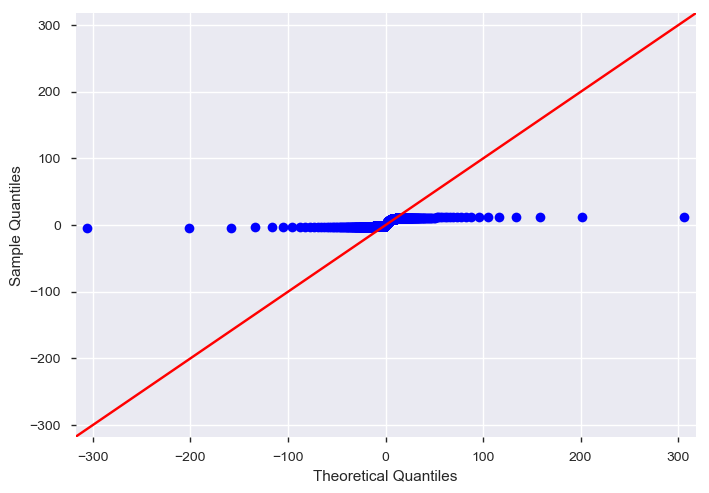

In [49]:
fig = sm.qqplot(ResiduosA1, stats.t, fit=True, line='45')

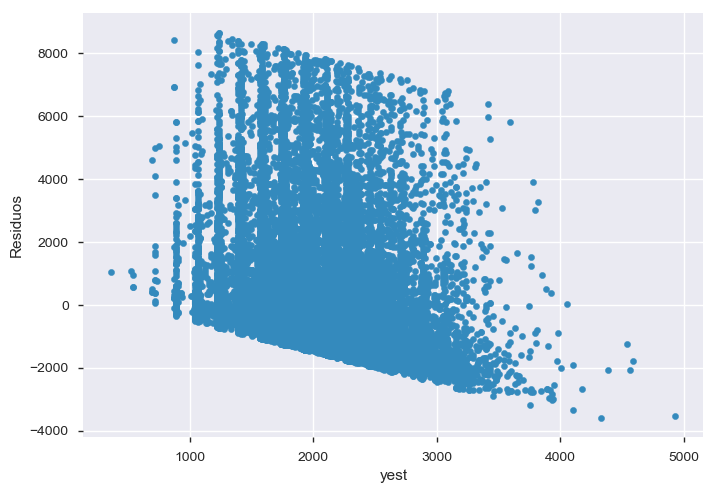

In [50]:
dfA1.plot(x='yest',y='Residuos',kind='scatter')

In [51]:
stats.shapiro(ResiduosA1)

C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8031899333000183, 0.0)

El ajuste en este modelo es de 0.561, el cual es excelente considerando el tamaño de la muestra, pero se debe a la alta correlación entre las variables shares y número de imágenes, si es fin de semana y el número de palabras en el títulos. La prueba de Jarque-Bera indica que los residuos en este modelo no son normales, la media está muy lejos de cero. Los residuos frente a los valores ajustados ya no presentan una tendencia marcada, con lo que se puede decir que el modelo está bien especificado. El estadístico de Durbin-Watson tiene un valor de 1.938, en este caso como tenemos 3 regresores y la muestra es de 34798, a un nivel de significancia de 0.05, el valor de teórico es 0.95, la hipótesis de autocorrelación de los residuos se rechazaría si el valor de contraste es menor que el teorico. En este caso no tenemos evidencia para rechazar la hipótesis.
Luego de verificar los supuestos, tenemos que los factores que determinan el la cantidad de artículos compartidos son wlnúmero de imágenes, si es fin de semana y el número de palabra. El modelo es:
Shares = 18.6234num_imgs + 607.3195is_weekend + 174.3068n_tokens_title

**10. Con base en los resultados ¿Qué propuesta puede realizar como científico de datos al área de costos, para disminuir el consumo de agua en la planta?**

Entre los resultados que tuvimos se observa que la variable shares tiene una mejor relación lineal con la variable is_weekend y n_tokens_title, por lo cual deben realizar sus publicaciones durante el fin de semana y con un número de palabras que le permita a los clientes entender sobre el producto y así poder compartirlo. El número de imágenes también se vio asociado y significa que entre más imágenes se pongan en la descripción, mayor será la probabilidad de compartir. En resumen, al usuario si se le da información completa y extensa el fin de semana sobre los productos, compartirá el artículo.